In [1]:
%matplotlib inline

from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn import preprocessing, model_selection, neighbors, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn import linear_model, decomposition, datasets


np.random.seed(0)


# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')


In [2]:
df_rain = pd.read_csv('rain_dataframe.csv', header=0, parse_dates=True,
    index_col=0)
df_rain.head()

,date_rain,rain,t_rain-20,t_rain-19,t_rain-18,t_rain-17,t_rain-16,t_rain-15,t_rain-14,t_rain-13,t_rain-12,t_rain-11,t_rain-10,t_rain-9,t_rain-8,t_rain-7
1,2014-12-28,0.0,0.0,3.8,9.0,26.4,1.4,0.0,1.8,2.2,6.6,2.4,7.5,0.5,1.1,0.3
2,2015-01-02,0.3,0.0,1.8,2.2,6.6,2.4,7.5,0.5,1.1,0.3,3.3,4.1,0.3,0.0,10.1
3,2015-02-04,0.0,5.8,2.6,1.4,0.0,1.9,6.6,0.1,0.0,2.4,0.0,2.7,0.4,0.4,3.8
4,2015-02-16,0.2,0.4,3.8,8.8,1.7,0.5,0.0,0.0,1.3,0.0,0.0,0.1,0.0,0.0,0.0
5,2015-02-28,1.7,0.0,0.0,0.0,0.0,0.0,4.5,0.0,6.2,0.2,0.0,0.8,3.6,2.5,0.2


In [3]:
df_evap = pd.read_csv('evap_dataframe.csv', header=0, parse_dates=True,
    index_col=0)
df_evap.head()

,date_evap,evap,t_evap-20,t_evap-19,t_evap-18,t_evap-17,t_evap-16,t_evap-15,t_evap-14,t_evap-13,t_evap-12,t_evap-11,t_evap-10,t_evap-9,t_evap-8,t_evap-7
1,2014-12-28,0.0,0.3,0.7,1.0,0.7,0.0,0.3,0.6,0.2,0.4,0.6,0.6,0.4,0.4,0.9
2,2015-01-02,0.6,0.3,0.6,0.2,0.4,0.6,0.6,0.4,0.4,0.9,0.9,0.6,0.4,0.2,0.5
3,2015-02-04,0.5,0.8,0.4,0.3,0.3,0.3,0.4,0.3,0.3,0.7,0.6,0.9,0.3,0.4,0.6
4,2015-02-16,0.8,0.4,0.6,0.8,0.7,0.8,0.5,0.4,0.4,0.5,0.5,0.5,0.6,0.3,0.5
5,2015-02-28,1.2,0.3,0.5,0.6,0.7,1.0,0.9,0.7,0.7,0.8,1.0,1.6,0.9,0.8,1.1


In [4]:
df_wlevel = pd.read_csv('wlevel_dataframe.csv', header=0, parse_dates=True,
    index_col=0)
df_wlevel.head()

,date_wlevel,w_level,t_wlevel-20,t_wlevel-19,t_wlevel-18,t_wlevel-17,t_wlevel-16,t_wlevel-15,t_wlevel-14,t_wlevel-13,t_wlevel-12,t_wlevel-11,t_wlevel-10
1,2014-12-28,33.814,33.205,33.157,33.158,33.194,33.328,33.426,33.425,33.424,33.413,33.451,33.522
2,2015-01-02,33.699,33.426,33.425,33.424,33.413,33.451,33.522,33.603,33.622,33.587,33.563,33.594
3,2015-02-04,33.659,33.988,34.117,34.139,34.127,34.090,34.058,34.038,34.002,33.955,33.915,33.862
4,2015-02-16,33.125,33.788,33.751,33.735,33.752,33.775,33.754,33.718,33.689,33.659,33.617,33.572
5,2015-02-28,33.391,33.470,33.421,33.369,33.319,33.268,33.217,33.190,33.145,33.125,33.100,33.057


In [5]:
# Import the excel file and call it xls_file
xls_file = pd.ExcelFile('classes.xls')
xls_file
xls_file.sheet_names
df_classes = xls_file.parse('Sheet1')
df_classes.head()

,Date,Class
0,2014-11-22,1
1,2014-12-28,1
2,2015-01-02,1
3,2015-02-04,1
4,2015-02-16,0


In [6]:
#clean up and remove unnessessary columns
df_rain.reset_index(drop=True, inplace=True)
df_evap.reset_index(drop=True, inplace=True)
df_wlevel.reset_index(drop=True, inplace=True)
df_classes.reset_index(drop=True, inplace=True)

df = pd.concat([df_classes,df_rain,df_evap,df_wlevel], axis=1)
df.drop('date_wlevel', axis=1, inplace=True)
df.drop('date_evap', axis=1, inplace=True)
df.drop('date_rain', axis=1, inplace=True)
df.drop('w_level', axis=1, inplace=True)
df.drop('evap', axis=1, inplace=True)
df.drop('rain', axis=1, inplace=True)
df.drop(66, axis=0, inplace=True)
df.to_csv('concat.csv')

In [7]:
X = np.array(df.drop(['Class', 'Date'], 1)) #Everything but the class
y = np.array(df['Class'])           #Class  
print(X)

[[  0.      3.8     9.    ...,  33.413  33.451  33.522]
 [  0.      1.8     2.2   ...,  33.587  33.563  33.594]
 [  5.8     2.6     1.4   ...,  33.955  33.915  33.862]
 ..., 
 [  0.6     0.2     0.4   ...,  32.783  32.765  32.745]
 [ 10.      3.3     0.    ...,  32.774  32.853  32.873]
 [  0.      0.      0.    ...,  32.873  32.869  32.873]]


In [8]:
X = StandardScaler().fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4)

pca1 = PCA()
pca = decomposition.PCA()
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)


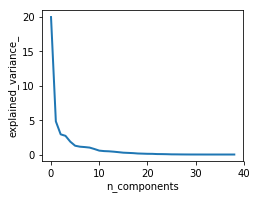

In [10]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

In [11]:
clf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
clf.fit(X_t_train, y_train)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print('score', clf.score(X_t_test, y_test))
print('pred label', clf.predict(X_t_test))

score 0.37037037037
pred label [0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0]


In [12]:
confidence = clf.score(X_t_test, y_test)
print(confidence)

0.37037037037


In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

NameError: name 'confusion_matrix' is not defined